In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from collections import OrderedDict

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

## T2 PvL

In [2]:
data = pd.read_csv('merge_denovo_Known_no_BA_t2pvl.csv',sep=',', index_col = 0)
#data = data.T
data

,Urobilin,Sumaresinolic acid,Urobilin (NIST14),Urobilin (NIST14).1,Urobilin (NIST14).2,Urobilin (NIST14).3,Urobilin (NIST14).4,Tris(2-butoxyethyl) phosphate (NIST14),Phe-Pro (NIST14),Oleoyl L-carnitine (NIST14),...,denovo478740,denovo491556,denovo549429,denovo560339,denovo560431,denovo564490,denovo573462,denovo584291,Week,Category
SampleID,,,,,,,,,,,,,,,,,,,,,
570.T2,0,0,5784,0,0,0,0,0,0,0,...,0,13,0,6,0,0,0,57,2,Placebo
571.T2,0,0,5344,0,0,0,0,0,0,0,...,1,0,0,5,0,0,0,12,2,Placebo
572.T2,0,32492,3693,0,0,0,0,0,0,0,...,0,4,0,24,3,1,0,2,2,Placebo
573.T2,0,0,2797,0,0,0,0,0,0,0,...,1,15,0,55,3,1,0,1,2,Placebo
574.T2,0,0,785,0,0,0,0,0,0,0,...,5,0,0,18,0,1,0,65,2,Placebo
575.T2,0,6970,0,0,0,0,0,0,0,0,...,1,3,0,33,0,0,0,53,2,Placebo
576.T2,3033,6420,6646,4128,38906,0,0,0,0,0,...,0,337,0,52,3,1,1,6,2,Placebo
577.T2,27886,38434,2530,6712,43633,0,0,0,0,4051,...,0,3,0,2,0,0,0,3,2,Placebo
578.T2,0,0,0,0,0,0,0,0,0,0,...,2,0,0,78,0,0,1,16,2,Letrozole


In [5]:
data.iloc[:,97]

SampleID
570.T2      Placebo
571.T2      Placebo
572.T2      Placebo
573.T2      Placebo
574.T2      Placebo
575.T2      Placebo
576.T2      Placebo
577.T2      Placebo
578.T2    Letrozole
580.T2    Letrozole
581.T2    Letrozole
582.T2    Letrozole
583.T2    Letrozole
584.T2    Letrozole
585.T2    Letrozole
586.T2    Letrozole
Name: Category, dtype: object

In [7]:
# Split the Groups from the dataset where y is category and x is data with species
y = data.iloc[:,97]
x = data.iloc[:,0:96]

In [8]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

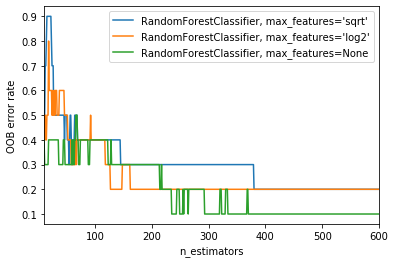

In [9]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 600

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [10]:
clf = RandomForestClassifier(n_estimators=400, max_features=None, random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.8


In [15]:
clf_final = RandomForestClassifier(n_estimators=400, max_features=None, random_state=42, oob_score=True)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.6666666666666666


In [16]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.7777777777777778

In [17]:
print(clf_final.oob_score_)

0.9


In [18]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(20)

2     0.2975
37    0.1175
49    0.0875
93    0.0825
26    0.0700
83    0.0350
81    0.0250
67    0.0225
77    0.0225
92    0.0200
19    0.0150
48    0.0150
80    0.0150
72    0.0125
79    0.0125
69    0.0125
95    0.0125
12    0.0100
41    0.0100
31    0.0100
dtype: float64

In [19]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(20)

,Gini-importance
Urobilin (NIST14),0.2975
Linoleic acid methyl ester,0.1175
Bacosine,0.0875
denovo564490,0.0825
Oleanolic acid methyl ester,0.0700
denovo356692,0.0350
denovo344458,0.0250
denovo283443,0.0225
denovo81639,0.0225
denovo560431,0.0200


## T2 LvCoL

In [20]:
data = pd.read_csv('merge_denovo_Known_no_BA_t2lvcol.csv',sep=',', index_col = 0)
#data = data.T
data

,Urobilin,Sumaresinolic acid,Urobilin (NIST14),Urobilin (NIST14).1,Urobilin (NIST14).2,Urobilin (NIST14).3,Urobilin (NIST14).4,Tris(2-butoxyethyl) phosphate (NIST14),Phe-Pro (NIST14),Oleoyl L-carnitine (NIST14),...,denovo478740,denovo491556,denovo549429,denovo560339,denovo560431,denovo564490,denovo573462,denovo584291,Week,Category
SampleID,,,,,,,,,,,,,,,,,,,,,
578.T2,0,0,0,0,0,0,0,0,0,0,...,2,0,0,78,0,0,1,16,2,Letrozole
580.T2,2282,0,0,0,23893,0,0,0,0,0,...,0,3,0,5,0,0,1,9,2,Letrozole
581.T2,11570,9301,0,6198,7143,0,0,0,0,0,...,1,0,0,97,0,0,0,2,2,Letrozole
582.T2,0,0,0,0,0,0,0,0,0,0,...,1,4,1,82,0,0,0,14,2,Letrozole
583.T2,0,0,0,0,0,0,0,0,0,0,...,7,5,1,21,0,0,2,13,2,Letrozole
584.T2,0,9707,0,0,0,0,0,0,0,0,...,0,1,1,434,0,0,0,31,2,Letrozole
585.T2,0,4198,0,0,0,0,0,0,0,0,...,12,10,0,294,0,0,0,5,2,Letrozole
586.T2,0,0,0,0,0,0,0,0,0,0,...,0,46,3,9,0,0,0,79,2,Letrozole
589.T2,22964,0,60065,0,13965,0,0,9786,14550,4293,...,0,0,0,10,0,0,1,16,2,Co-L


In [22]:
data.iloc[:,97]

SampleID
578.T2    Letrozole
580.T2    Letrozole
581.T2    Letrozole
582.T2    Letrozole
583.T2    Letrozole
584.T2    Letrozole
585.T2    Letrozole
586.T2    Letrozole
589.T2         Co-L
591.T2         Co-L
593.T2         Co-L
595.T2         Co-L
597.T2         Co-L
599.T2         Co-L
601.T2         Co-L
603.T2         Co-L
Name: Category, dtype: object

In [23]:
# Split the Groups from the dataset where y is category and x is data with species
y = data.iloc[:,97]
x = data.iloc[:,0:96]

In [24]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

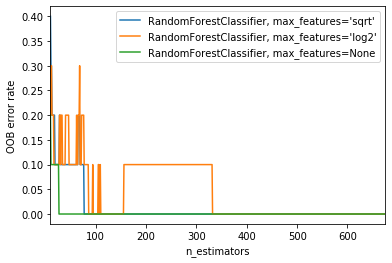

In [25]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 675

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [26]:
clf = RandomForestClassifier(n_estimators=100, max_features=None, random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 1.0


In [27]:
clf_final = RandomForestClassifier(n_estimators=100, max_features=None, random_state=9, oob_score=True)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 1.0


In [28]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

1.0

In [29]:
print(oob_error)

0.0


In [30]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(20)

58    0.12
26    0.10
19    0.10
2     0.08
14    0.08
0     0.08
12    0.07
53    0.06
67    0.05
92    0.03
39    0.03
49    0.02
56    0.02
69    0.02
94    0.01
31    0.01
45    0.01
60    0.01
63    0.01
23    0.01
dtype: float64

In [31]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(20)

,Gini-importance
1-Palmitoyl-sn-glycero-3-phosphocholine,0.12
Phytomonic acid,0.10
Oleanolic acid methyl ester,0.10
phosphocholine (NIST14).2,0.08
Urobilin,0.08
Urobilin (NIST14),0.08
phosphocholine (NIST14),0.07
4-Cholestenone,0.06
denovo81639,0.05
Genistein,0.03


## T5 LvCoL

In [32]:
data = pd.read_csv('merge_denovo_Known_no_BA_t5lvcol.csv',sep=',', index_col = 0)
#data = data.T
data

,Urobilin,Sumaresinolic acid,Urobilin (NIST14),Urobilin (NIST14).1,Urobilin (NIST14).2,Urobilin (NIST14).3,Urobilin (NIST14).4,Tris(2-butoxyethyl) phosphate (NIST14),Phe-Pro (NIST14),Oleoyl L-carnitine (NIST14),...,denovo478740,denovo491556,denovo549429,denovo560339,denovo560431,denovo564490,denovo573462,denovo584291,Week,Category
SampleID,,,,,,,,,,,,,,,,,,,,,
578.T5,0,0,0,0,0,0,0,0,0,6083,...,22,0,5,118,1,0,105,25,5,Letrozole
580.T5,5245,0,0,6703,6519,0,0,0,0,0,...,0,1,0,6,4,4,3,62,5,Letrozole
581.T5,13247,0,0,0,9531,0,0,0,1942,0,...,0,2,0,38,2,1,1,83,5,Letrozole
582.T5,0,0,0,0,0,0,0,0,0,0,...,0,17,3,32,0,0,265,136,5,Letrozole
583.T5,0,0,0,0,0,0,0,0,0,0,...,0,1,9,14,0,0,2,130,5,Letrozole
584.T5,18011,37491,8883,0,23016,0,6406,0,0,0,...,1,51,0,6,1,0,2,11,5,Letrozole
585.T5,24037,6618,11570,0,0,1915,0,0,0,0,...,1,3,0,34,1,0,2,4,5,Letrozole
586.T5,0,23686,897,0,0,0,0,0,0,0,...,0,31,13,48,2,0,0,238,5,Letrozole
589.T5,6925,0,0,3461,0,0,0,0,0,0,...,0,3,0,2,0,0,0,5,5,Co-L


In [33]:
data.iloc[:,97]

SampleID
578.T5    Letrozole
580.T5    Letrozole
581.T5    Letrozole
582.T5    Letrozole
583.T5    Letrozole
584.T5    Letrozole
585.T5    Letrozole
586.T5    Letrozole
589.T5         Co-L
591.T5         Co-L
593.T5         Co-L
595.T5         Co-L
597.T5         Co-L
599.T5         Co-L
Name: Category, dtype: object

In [34]:
# Split the Groups from the dataset where y is category and x is data with species
y = data.iloc[:,97]
x = data.iloc[:,0:96]

In [35]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

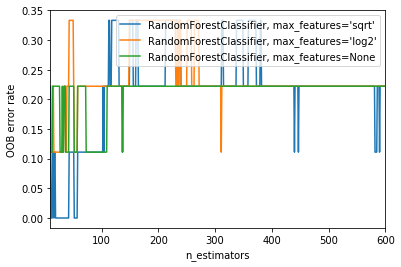

In [36]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 600

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [39]:
clf = RandomForestClassifier(n_estimators=200, max_features='sqrt', random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

/home/basilin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Mean Validation Scores: 0.7333333333333333


In [43]:
clf_final = RandomForestClassifier(n_estimators=200, bootstrap=True, max_features='sqrt',
                                   random_state= 40,oob_score= True)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.4


In [44]:
rf_probs = clf_final.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.5

In [45]:
print(clf_final.oob_score_)

0.6666666666666666


In [46]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(20)

55    0.073615
75    0.064459
68    0.057908
91    0.055044
12    0.046397
19    0.037278
87    0.030128
81    0.029337
89    0.028280
83    0.027697
92    0.025383
95    0.024599
58    0.022307
78    0.022048
71    0.021091
82    0.020849
79    0.019898
60    0.019345
62    0.017174
38    0.016512
dtype: float64

In [47]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(20)

,Gini-importance
3-Hydroxykynurenine,0.073615
denovo272061,0.064459
denovo90825,0.057908
denovo560339,0.055044
phosphocholine (NIST14),0.046397
Phytomonic acid,0.037278
denovo474098,0.030128
denovo344458,0.029337
denovo491556,0.028280
denovo356692,0.027697


## T5 PvL

In [48]:
data = pd.read_csv('merge_denovo_Known_no_BA_t5pvl.csv',sep=',', index_col = 0)
#data = data.T
data

,Urobilin,Sumaresinolic acid,Urobilin (NIST14),Urobilin (NIST14).1,Urobilin (NIST14).2,Urobilin (NIST14).3,Urobilin (NIST14).4,Tris(2-butoxyethyl) phosphate (NIST14),Phe-Pro (NIST14),Oleoyl L-carnitine (NIST14),...,denovo478740,denovo491556,denovo549429,denovo560339,denovo560431,denovo564490,denovo573462,denovo584291,Week,Category
SampleID,,,,,,,,,,,,,,,,,,,,,
570.T5,0,15874,0,0,0,0,0,0,0,0,...,0,1,2,42,0,0,0,131,5,Placebo
571.T5,0,0,0,0,0,0,0,0,0,0,...,106,1,2,85,0,0,1,109,5,Placebo
572.T5,0,0,2527,0,0,0,0,0,0,0,...,0,0,0,3,1,5,1,11,5,Placebo
573.T5,0,2361,0,0,0,0,0,0,0,0,...,0,0,0,15,0,4,1,77,5,Placebo
574.T5,0,11902,2918,0,0,0,0,0,0,0,...,96,5,2,65,1,1,1,99,5,Placebo
575.T5,0,0,0,0,0,0,0,0,0,0,...,126,2,6,31,1,0,0,61,5,Placebo
576.T5,0,7212,0,0,0,0,0,0,0,0,...,1,608,0,3,31,1,0,2,5,Placebo
577.T5,0,27227,0,0,3499,0,0,17026,0,0,...,0,120,0,3,19,0,1,9,5,Placebo
578.T5,0,0,0,0,0,0,0,0,0,6083,...,22,0,5,118,1,0,105,25,5,Letrozole


In [50]:
data.iloc[:,97]

SampleID
570.T5      Placebo
571.T5      Placebo
572.T5      Placebo
573.T5      Placebo
574.T5      Placebo
575.T5      Placebo
576.T5      Placebo
577.T5      Placebo
578.T5    Letrozole
580.T5    Letrozole
581.T5    Letrozole
582.T5    Letrozole
583.T5    Letrozole
584.T5    Letrozole
585.T5    Letrozole
586.T5    Letrozole
Name: Category, dtype: object

In [51]:
# Split the Groups from the dataset where y is category and x is data with species
y = data.iloc[:,97]
x = data.iloc[:,0:96]

In [52]:
# Split the data into training and test data for the categories(y) and dataset(x)
# Here we are spliting it 65% training and 35% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=42)

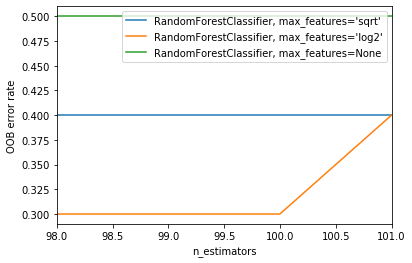

In [57]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", 
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True, 
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True, 
                               random_state=42))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 98
max_estimators = 101

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [58]:
clf = RandomForestClassifier(n_estimators=100, max_features='log2', random_state=42)
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print('Mean Validation Scores: ' ,end='')
print(np.mean(all_accuracies))

Mean Validation Scores: 0.8


In [59]:
clf_final = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='log2',oob_score=True,
                                   random_state= 42)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.6666666666666666


In [60]:
print(clf_final.oob_score_)

0.7


In [61]:
feature_importance = pd.Series(clf_final.feature_importances_).sort_values(ascending=False)
feature_importance.head(20)

72    0.085303
83    0.077905
71    0.041786
82    0.038927
76    0.037054
66    0.036528
37    0.035863
87    0.035000
91    0.029286
81    0.028512
80    0.028036
27    0.026190
0     0.025741
79    0.025422
95    0.023750
42    0.022873
77    0.020942
70    0.020640
26    0.020000
31    0.019603
dtype: float64

In [62]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, clf_final.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imp=importances.sort_values(by='Gini-importance',ascending=False)
imp.head(20)

,Gini-importance
denovo175813,0.085303
denovo356692,0.077905
denovo167965,0.041786
denovo353230,0.038927
denovo278275,0.037054
denovo79770,0.036528
Linoleic acid methyl ester,0.035863
denovo474098,0.035000
denovo560339,0.029286
denovo344458,0.028512
